In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df = pd.read_csv("hf://datasets/leostelon/california-housing/housing.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

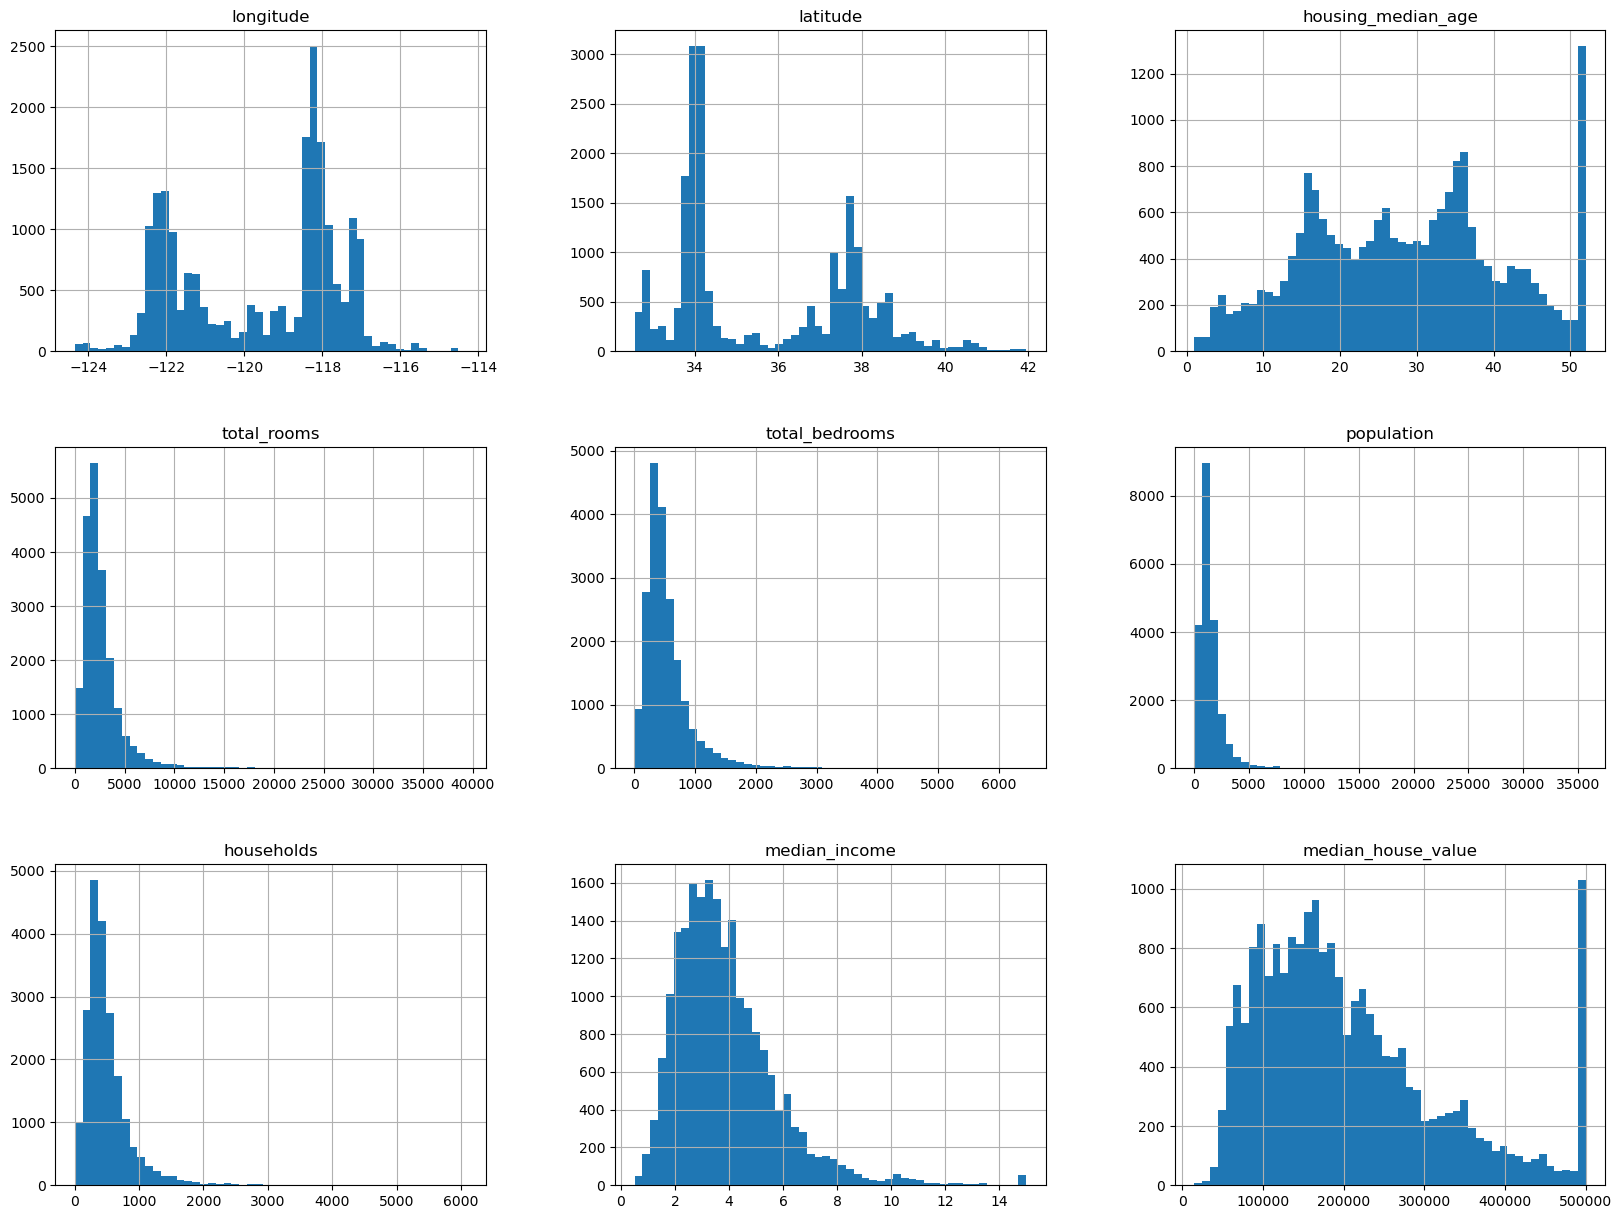

In [20]:
df.hist(bins=50, figsize=(20,15))

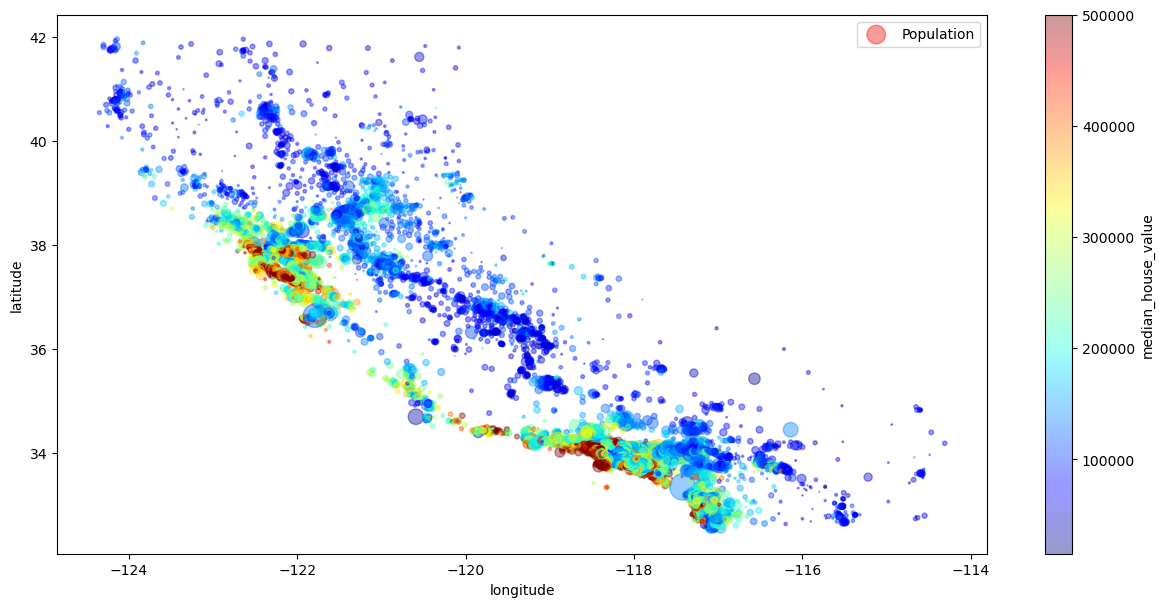

In [30]:
df.plot(kind='scatter', 
        x='longitude', 
        y='latitude', 
        alpha=0.4, 
        s=df['population']/100, 
        label='Population',
        figsize=(15,7),
        c='median_house_value',
        cmap=plt.get_cmap('jet'),
        colorbar=True)

plt.legend()
plt.show()

<Axes: >

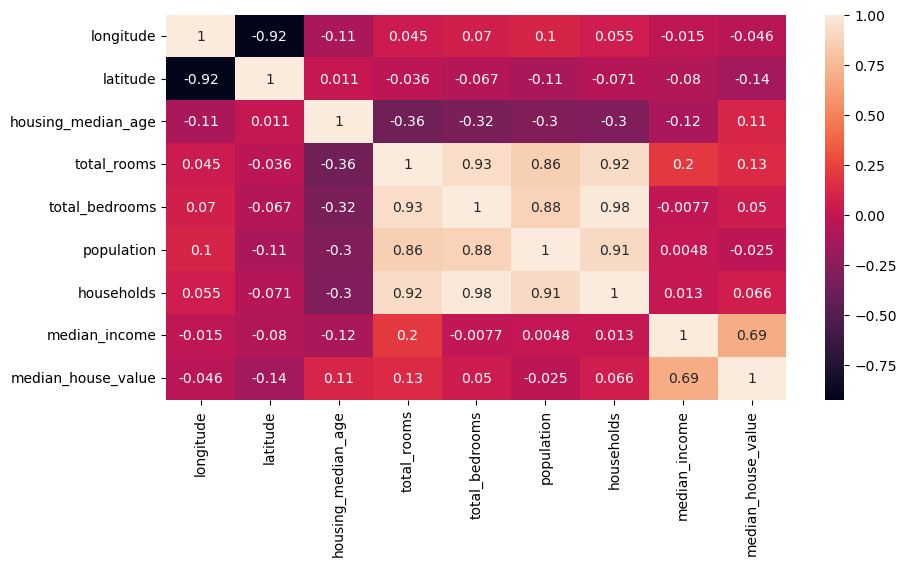

In [36]:
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(numeric_only=True), annot=True)

In [37]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [38]:
data = df.copy()

data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

In [39]:
data_corr_matrix = data.corr(numeric_only=True)
data_corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [41]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

/tmp/ipykernel_13027/1676755818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [ ]:
#Transform categorical features

In [49]:
data_ocean = data[['ocean_proximity']]

ordinal_encoder = OrdinalEncoder()

data_ocean_encoded = ordinal_encoder.fit_transform(data_ocean)

In [50]:
np.random.choice(data_ocean_encoded.ravel(), size=10)

array([1., 0., 4., 1., 0., 0., 3., 3., 0., 1.])

In [54]:
oh_encoder = OneHotEncoder()
data_ocean_oh_encoded = oh_encoder.fit_transform(data_ocean)

In [56]:
data_ocean_oh_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

In [57]:
oh_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
encoded_data = pd.DataFrame(data_ocean_oh_encoded.toarray(), columns=oh_encoder.get_feature_names_out())

encoded_data.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


# ML Algoritms

In [68]:
y_values = data['median_house_value'].values.reshape(-1,1)
columnas = ['median_income', 'rooms_per_household','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []

for col in columnas:
    col_modelo.append(col)
    data1 = data[col_modelo]
    data1 = pd.concat([data1, encoded_data], axis=1)
    x_values = data1.values

    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    y_pred = tree_reg.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(col_modelo, r2)

['median_income'] 0.27608758251975607
['median_income', 'rooms_per_household'] 0.22984357465410965
['median_income', 'rooms_per_household', 'total_rooms'] 0.24655864550120132
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.3607043687989948
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.35293509096620945
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] 0.4703221438986497
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] 0.659860735465167


In [72]:
y_values = data['median_house_value'].values.reshape(-1,1)
columnas = ['median_income', 'rooms_per_household','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []

for col in columnas:
    col_modelo.append(col)
    data1 = data[col_modelo]
    data1 = pd.concat([data1, encoded_data], axis=1)
    x_values = data1.values

    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)
    tree_reg = RandomForestRegressor()
    tree_reg.fit(x_train, y_train)
    y_pred = tree_reg.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(col_modelo, r2)

/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income'] 0.4384144337181477


/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income', 'rooms_per_household'] 0.5574504494510765


/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income', 'rooms_per_household', 'total_rooms'] 0.5829715222072627


/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.6358061184318395


/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.6611144314890998


/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] 0.7168015003236938


/home/emanuel/Developer/Personal/learning-ia/ml-tree-regression/.conda/lib/python3.11/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] 0.8271999076245649
